<a href="https://colab.research.google.com/github/KoreTane/PredictiveLeadManagement/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install xlsxwriter
#!pip install fuzzywuzzy
#!pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 37.8 MB/s eta 0:00:00


In [2]:
import pandas as pd  # Manipulação de dados em formato de tabela
import numpy as np  # Para operações numéricas
from scipy import stats  # Para estatística e análise de dados
import xlsxwriter  # Criar e manipular arquivos Excel
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Biblioteca para visualização de dados
from scipy.stats import chi2_contingency  # Função para calcular a estatística de qui-quadrado
import math  # Operações matemáticas
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import tabula
import warnings

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
dfc = pd.read_excel('CrmAgendaClientes.xlsx')
warnings.filterwarnings('ignore')

In [4]:
# Definir tema global para os gráficos
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [5]:
# Listar os atributos e funções de um objeto, excluindo os que começam com _
def list_attributes(obj):
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

<h1><font size="5" color="#FF69B4">Análise dos dados</font></h1>

<p><font size="4">Durante a EDA, utilizamos gráficos e visualizações para revelar padrões e tendências ocultas nos dados. Além disso, exploramos relações entre variáveis, identificando correlações úteis para a construção de modelos preditivos.</font></p>

In [6]:
dfc.head(5)

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,GENERO,TELEFONE,TIPO CONTATO,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,SITUAÇÃO_FINAL
0,2022-01-07,1,GRAZIELE,22,ADULTO,MASCULINO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,Não agendou,NOITE,ALISSON,SIM,MATRICULADO
1,2022-01-07,1,CAMILA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,Não agendou,NOITE,LIA,NÃO,DESISTIU
2,2021-01-05,1,MAIARA GOUVEA,16,ADOLESCENTE,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,K-POP,Não agendou,NOITE,ALISSON,NÃO,DESISTIU
3,2021-01-05,1,ENIALE RAMOS QUINTINO MÃE ELAINE,11,CRIANÇA,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,JAZZ,Não agendou,TARDE,LIA,SIM,MATRICULADO
4,2022-01-07,1,BIA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,BALLET CLÁSSICO,Não agendou,NOITE,NÃO INFORMADO,NÃO,DESISTIU


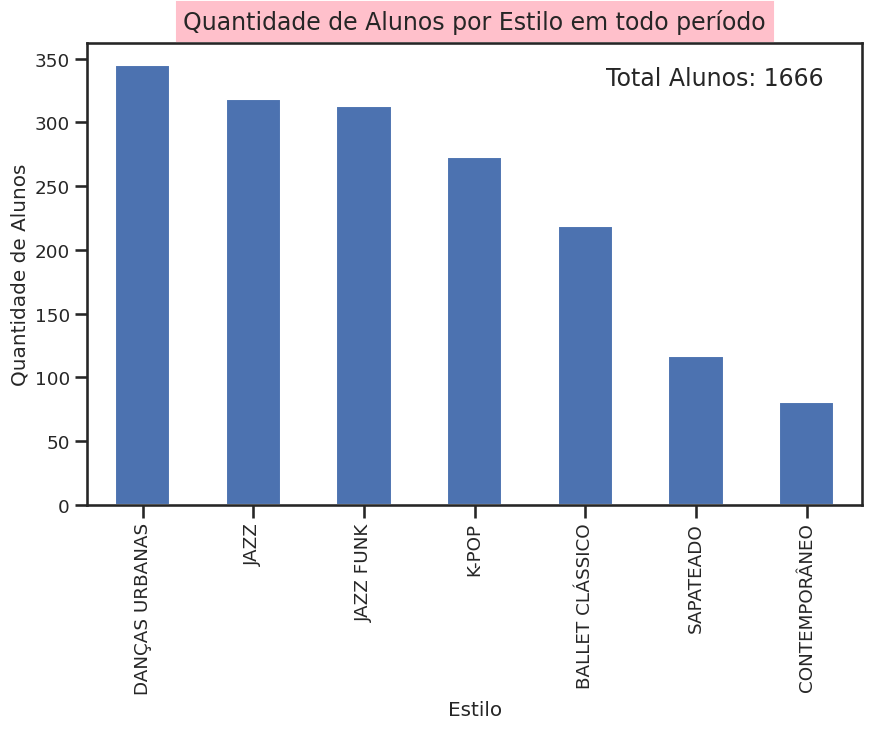

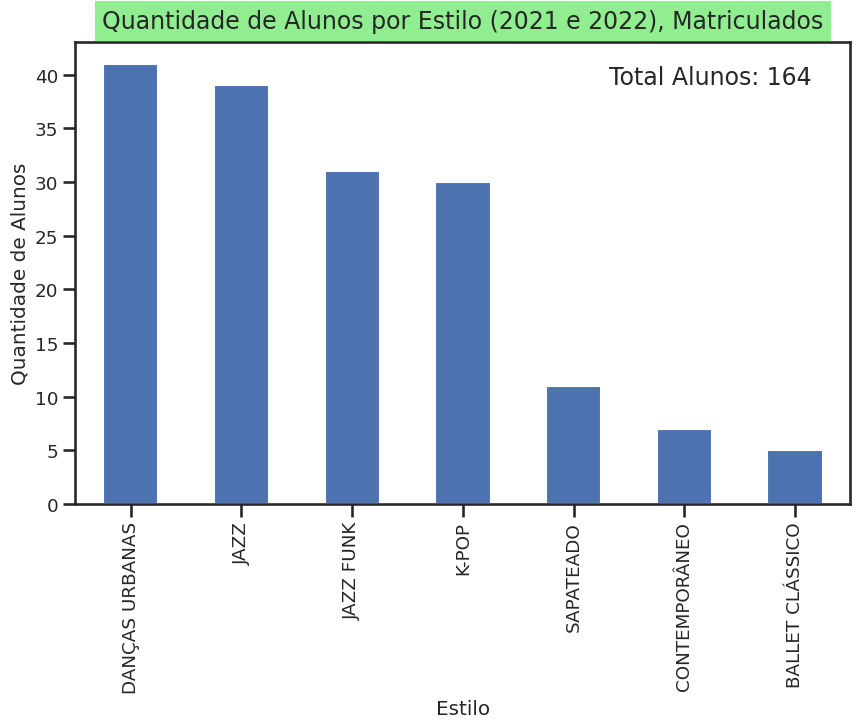

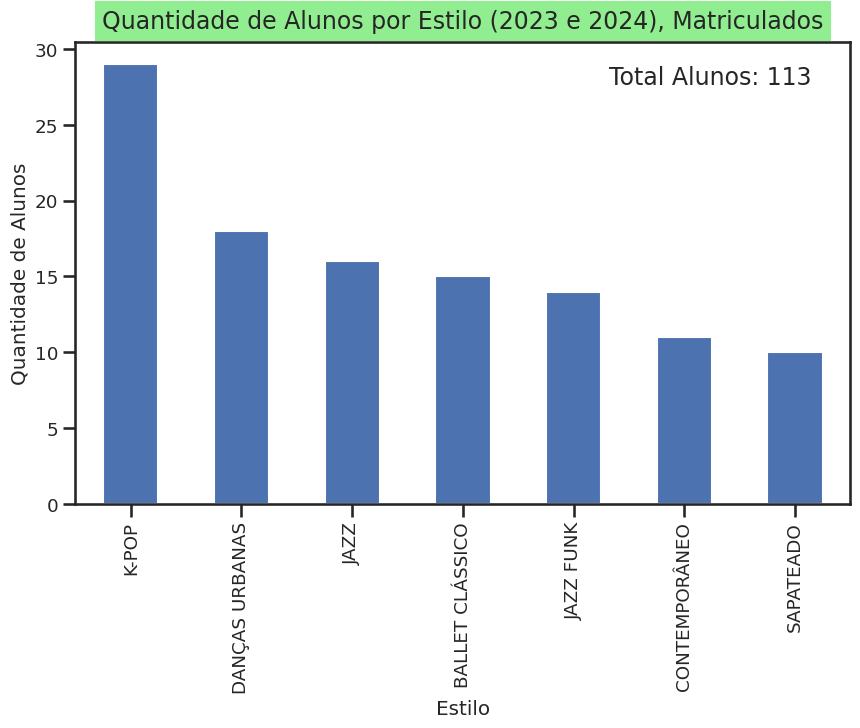

In [7]:
# Contar a quantidade de alunos por estilo
style_counts1 = dfc['ESTILOS'].value_counts()

# Filtrar apenas os registros com anos de 2023 e 2024 e situação final 'MATRICULADO'
filtered_dfC = dfc[(dfc['DATA 1º CONTATO'].dt.year.isin([2023, 2024])) & (dfc['SITUAÇÃO_FINAL'] == 'MATRICULADO')]

# Filtrar apenas os registros com anos de 2021 e 2022 e situação final 'MATRICULADO'
filtered_dfCA = dfc[(dfc['DATA 1º CONTATO'].dt.year.isin([2021, 2022])) & (dfc['SITUAÇÃO_FINAL'] == 'MATRICULADO')]

# Contar a quantidade de alunos por estilo para 2023 e 2024
style_counts = filtered_dfC['ESTILOS'].value_counts()

# Contar a quantidade de alunos por estilo para 2021 e 2022
style_counts_2021_2022 = filtered_dfCA['ESTILOS'].value_counts()

# Plotar o gráfico de barras qtd. alundos x estilos
plt.figure(figsize=(10, 6))
style_counts1.plot(kind='bar')
plt.title('Quantidade de Alunos por Estilo em todo período',
           backgroundcolor='#FFC0CB',
           pad=10,
           fontsize=17)
plt.xlabel('Estilo')
plt.ylabel('Quantidade de Alunos')
plt.text(0.95, 0.95, f'Total Alunos: {len(dfc)}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=17)
plt.show()

# Plotar o gráfico de barras qtd. alundos x estilos para 2021 e 2022
plt.figure(figsize=(10, 6))
style_counts_2021_2022.plot(kind='bar')
plt.title('Quantidade de Alunos por Estilo (2021 e 2022), Matriculados',
           backgroundcolor='lightgreen',
           pad=10,
           fontsize=17)
plt.xlabel('Estilo')
plt.ylabel('Quantidade de Alunos')
plt.text(0.95, 0.95, f'Total Alunos: {len(filtered_dfCA)}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=17)
plt.show()

# Plotar o gráfico de barras qtd. alundos x estilos para 2023 e 2024
plt.figure(figsize=(10, 6))
style_counts.plot(kind='bar')
plt.title('Quantidade de Alunos por Estilo (2023 e 2024), Matriculados',
           backgroundcolor='lightgreen',
           pad=10,
           fontsize=17)
plt.xlabel('Estilo')
plt.ylabel('Quantidade de Alunos')
plt.text(0.95, 0.95, f'Total Alunos: {len(filtered_dfC)}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=17)
plt.show()

In [8]:
# Criar uma tabela de contingência entre as variáveis
contingency_table = pd.crosstab(dfc['FAIXA ETARIA'], dfc['ESTILOS'])

In [9]:
# Calcular o valor de Cramer's V (Medida de correlação entre FAIXA ETARIA e ESTILOS, onde 0 é nenhuma correlação e 1 é correlação perfeita)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_v = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

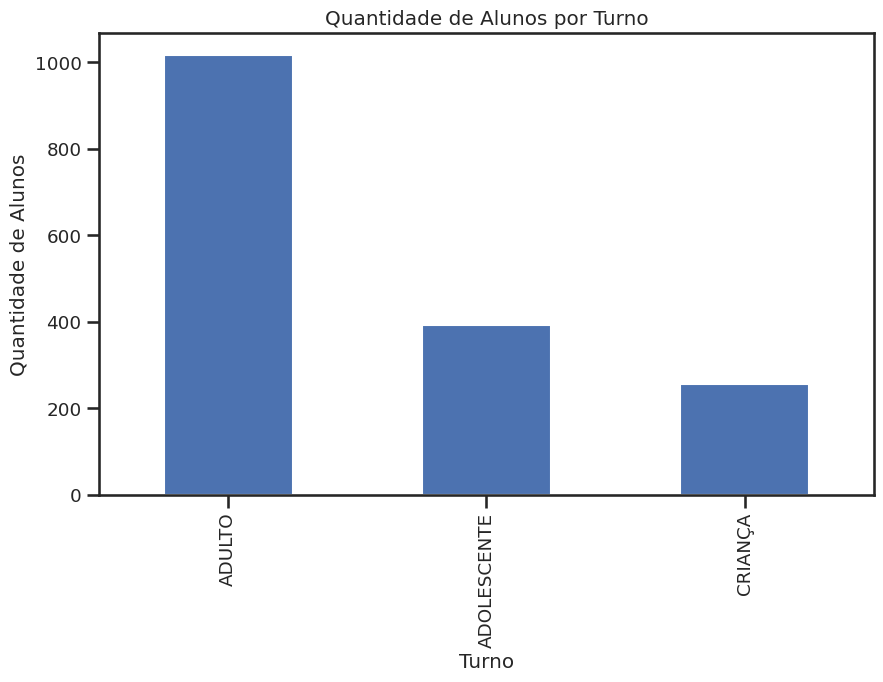

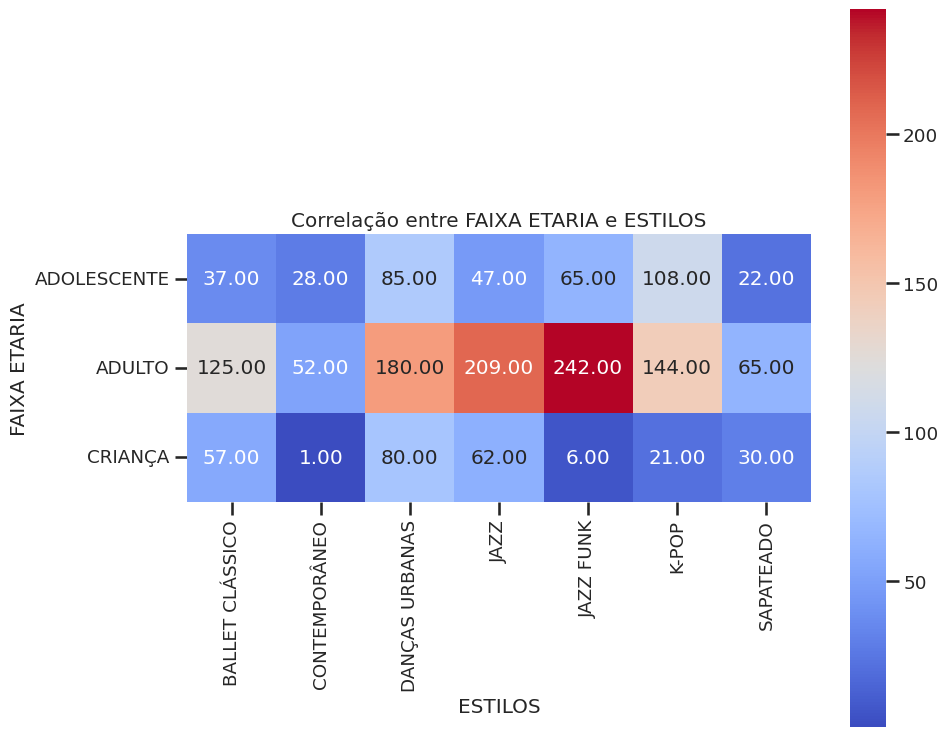

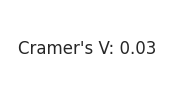

In [10]:
style_countsF = dfc['FAIXA ETARIA'].value_counts()
contingency_table = pd.crosstab(dfc['FAIXA ETARIA'], dfc['ESTILOS'])
plt.figure(figsize=(10, 6))
style_countsF.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre FAIXA ETARIA e ESTILOS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_v:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variávei faixa etaria e estilos

In [11]:
contingency_tableT = pd.crosstab(dfc['TURNO'], dfc['ESTILOS'])

In [12]:
# Calcular o valor de Cramer's V (Medida de correlação entre TURNO e ESTILOS)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_vT = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

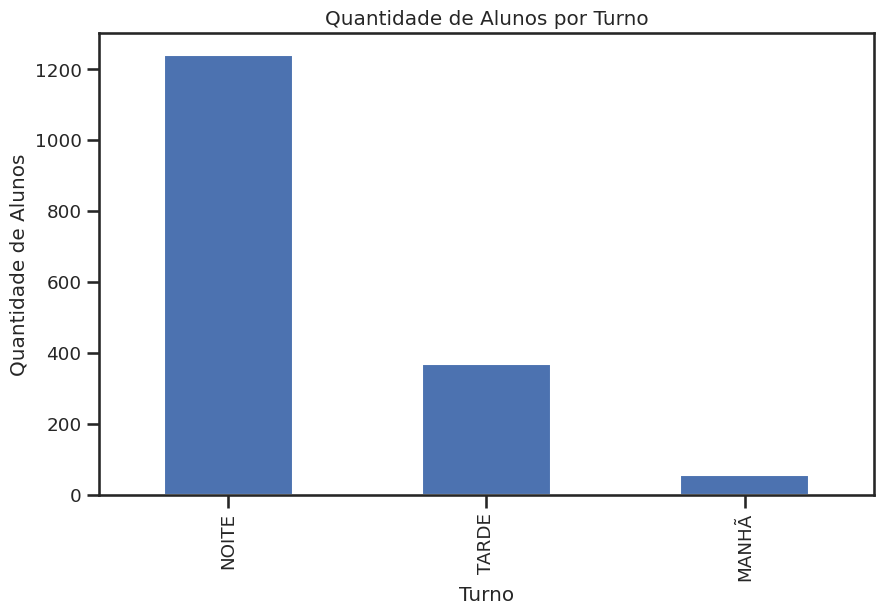

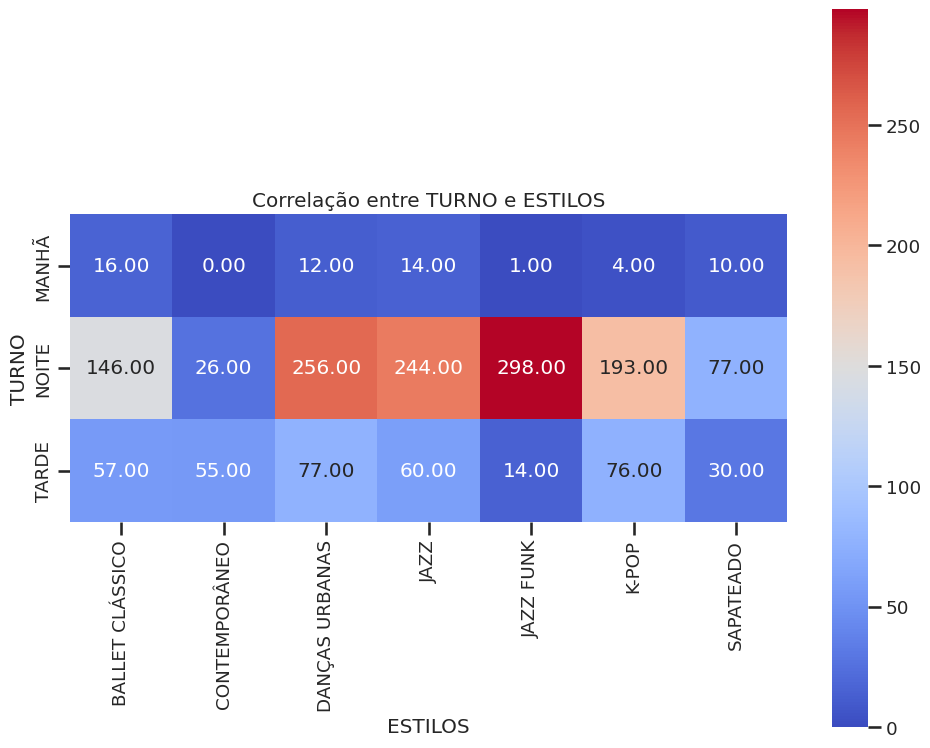

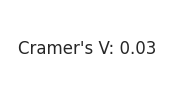

In [13]:
style_countsT = dfc['TURNO'].value_counts()

plt.figure(figsize=(10, 6))
style_countsT.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_tableT, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre TURNO e ESTILOS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_vT:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variáveis turno e estilos

In [14]:
contingency_tableG = pd.crosstab(dfc['GENERO'], dfc['ESTILOS'])

In [15]:
# Calcular o valor de Cramer's V (Medida de correlação entre GENERO e ESTILOS)
chi2, p, dof, expected = chi2_contingency(contingency_table)
cramer_vG = math.sqrt(chi2 / (dfc.shape[0] * dfc.shape[1] * (dof - 1)))

<Figure size 1000x800 with 0 Axes>

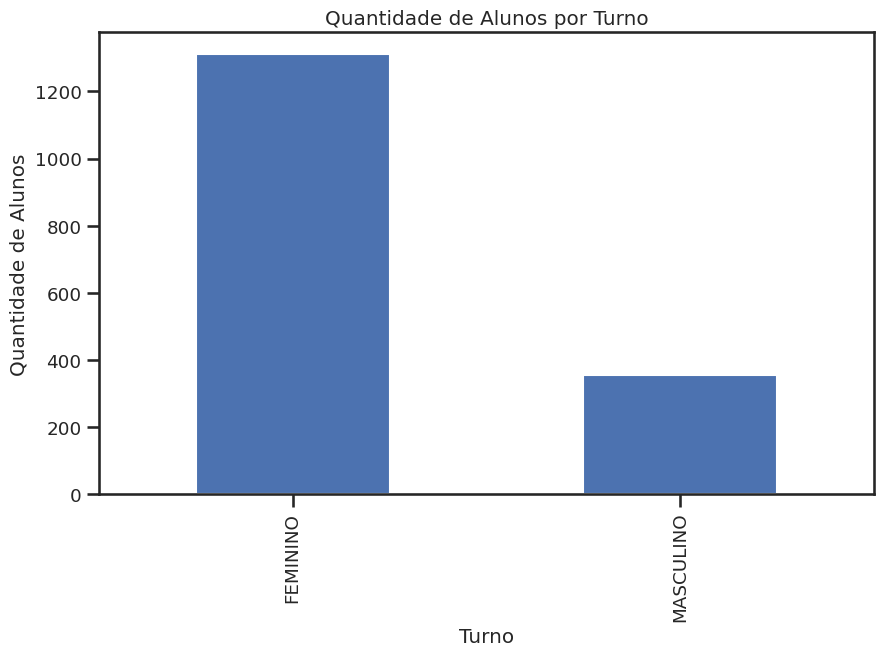

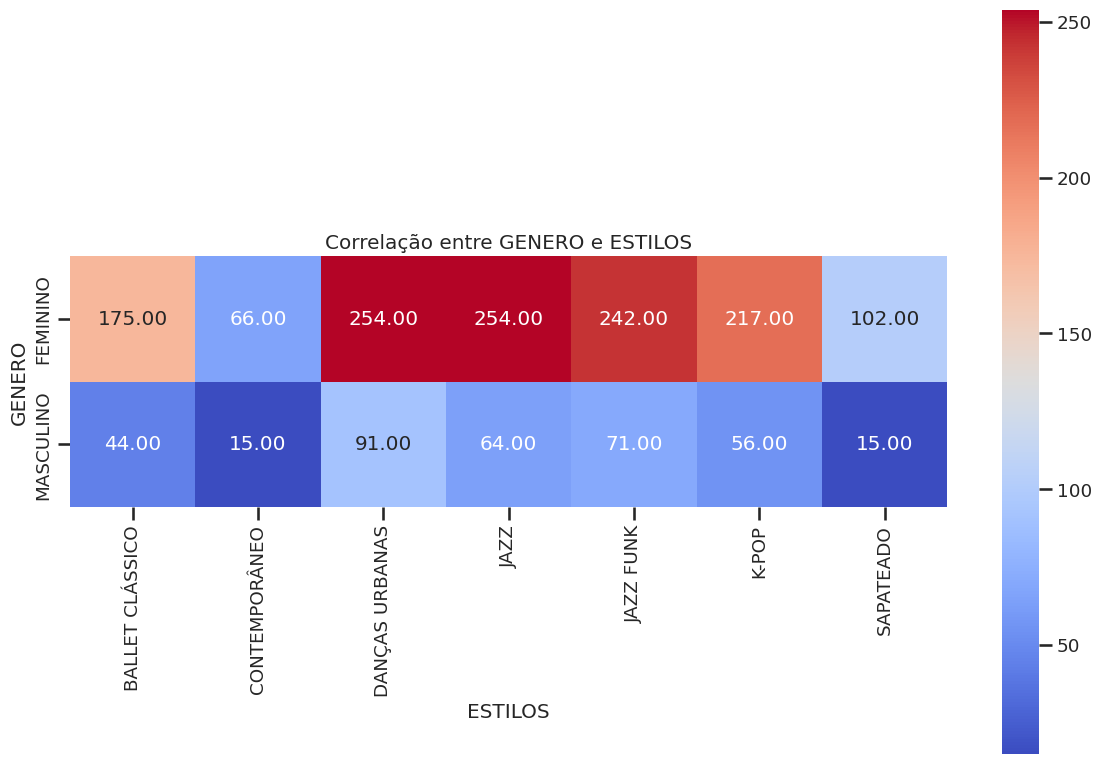

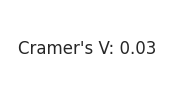

In [16]:
plt.figure(figsize=(10, 8))
style_countsG = dfc['GENERO'].value_counts()

plt.figure(figsize=(10, 6))
style_countsG.plot(kind='bar')
plt.title('Quantidade de Alunos por Turno')
plt.xlabel('Turno')
plt.ylabel('Quantidade de Alunos')
plt.show()
sns.heatmap(contingency_tableG, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlação entre GENERO e ESTILOS')
plt.tight_layout()
plt.show()

plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, f'Cramer\'s V: {cramer_vT:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.show() # Cramer's V é: 0.02 associação fraca entre as variáveis turno e estilos

In [17]:
dfc.head(5)

,DATA 1º CONTATO,TRIMESTRE,NOME COMPLETO,IDADE,FAIXA ETARIA,GENERO,TELEFONE,TIPO CONTATO,VIA,ESTILOS,DATA AGENDAMENTO,TURNO,PROFESSOR,COMPARECEU,SITUAÇÃO_FINAL
0,2022-01-07,1,GRAZIELE,22,ADULTO,MASCULINO,0000-0000,AULA EXPERIMENTAL,WHATSAPP,JAZZ FUNK,Não agendou,NOITE,ALISSON,SIM,MATRICULADO
1,2022-01-07,1,CAMILA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,JAZZ,Não agendou,NOITE,LIA,NÃO,DESISTIU
2,2021-01-05,1,MAIARA GOUVEA,16,ADOLESCENTE,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,K-POP,Não agendou,NOITE,ALISSON,NÃO,DESISTIU
3,2021-01-05,1,ENIALE RAMOS QUINTINO MÃE ELAINE,11,CRIANÇA,FEMININO,0000-0000,AULA EXPERIMENTAL,WHATS,JAZZ,Não agendou,TARDE,LIA,SIM,MATRICULADO
4,2022-01-07,1,BIA,19,ADULTO,FEMININO,0000-0000,CAPTAÇÃO,WHATSAPP,BALLET CLÁSSICO,Não agendou,NOITE,NÃO INFORMADO,NÃO,DESISTIU


In [18]:
dfc['TIPO CONTATO'].unique()

array(['AULA EXPERIMENTAL', 'CAPTAÇÃO', 'CAPTAÇÃO '], dtype=object)

In [19]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA 1º CONTATO   1666 non-null   datetime64[ns]
 1   TRIMESTRE         1666 non-null   int64         
 2   NOME COMPLETO     1664 non-null   object        
 3   IDADE             1666 non-null   int64         
 4   FAIXA ETARIA      1666 non-null   object        
 5   GENERO            1666 non-null   object        
 6   TELEFONE          1666 non-null   object        
 7   TIPO CONTATO      1666 non-null   object        
 8   VIA               1666 non-null   object        
 9   ESTILOS           1666 non-null   object        
 10  DATA AGENDAMENTO  1666 non-null   object        
 11  TURNO             1666 non-null   object        
 12  PROFESSOR         1666 non-null   object        
 13  COMPARECEU        1666 non-null   object        
 14  SITUAÇÃO_FINAL    1666 n

<h1><font size="5" color="#FF69B4">Base Matricula CEP</font></h1>

<p><font size="4"> Essa base contém a matricula, nome completo do aluno e cep. Servirá para identificarmos os usuários ativos hoje que estão no leed de alunos e também o cep para geolocalização do dashboard no Power BI.</font></p>

In [20]:
dfm =pd.read_excel('MatriculaCEP.xlsx')

In [21]:
dfm

,Matrícula,Nome,CEP
0,23001,Clara Yumi Shiraishi,12242-431
1,23002,Luisa Mendes Hypolito Neves Pires,12243-710
2,23003,Sofia Mendes Hypolito Neves Pires,12243-710
3,23008,Maria Eduarda Guedes Santos,12231-070
4,23009,Maria Clara Coelho,12242-410
...,...,...,...
86,24030,Henrique Fernandes Veloso,12243-630
87,24031,Priscilla Pereira Figueiredo,12233-002
88,24032,Rafaela Luchi Marques Penteado,12237-410
89,24033,Leticia Akemi Kague,12246-021


In [22]:
# Deixe a coluna "Nome" em caixa alta
dfm['Nome'] = dfm['Nome'].str.upper()

In [23]:
nomes_comuns = dfm['Nome'][dfm['Nome'].isin(dfc['NOME COMPLETO'])]
nomes_comuns

31         GIOVANNA PEREIRA FLORES
40         MEIRE NAKAMURA YAMAMOTO
45      MARIA RITA BARROS MEDEIROS
53      BENJAMIN PONTE DE OLIVEIRA
55                JOYCE CRUZ PONTE
57        CLARA KRUSCHEWSKY FRANCO
58     MYLENA RODRIGUES GOMES ARÃO
59    ISABELLY CRISTINA REIS SILVA
63             CLARA ARRUDA COELHO
72     ISABELLA IRIE TEIXEIRA REIS
80          ANA CLARA MELO JARONES
Name: Nome, dtype: object

In [ ]:
nomes_parecidos = []
for nome in dfm['Nome']:
    for outro_nome in dfc['NOME COMPLETO']:
        if isinstance(nome, float) or isinstance(outro_nome, float):
            continue
        if fuzz.ratio(str(nome), str(outro_nome)) > 80:  # ajuste o valor de threshold aqui
            nomes_parecidos.append((nome, outro_nome))
nomes_parecidos

In [ ]:
nomes_parecidos = pd.Series(nomes_parecidos)
nomes_parecidos.value_counts()

<h1><font size="5" color="#FF69B4">DF2 ML</font></h1>

<p><font size="4">A base com a diferença de dias do primeiro contato e o agendamento para aula experimental. Aqui vamos verificar também se existe influência na firença de dias entre o primeiro contato e o agendamento para a conversão em matrícula. </font></p>

In [ ]:
dfc2 = dfc

# Substituir valores inválidos por nulo
dfc2['DATA 1º CONTATO'].replace('Não agendou', pd.NA, inplace=True)
dfc2['DATA AGENDAMENTO'].replace('Não agendou', pd.NA, inplace=True)

# Criar uma coluna com a diferença em dias entre as datas
dfc2['DIFERENCA_DIAS'] = (pd.to_datetime(dfc2['DATA AGENDAMENTO'], errors='coerce') - pd.to_datetime(dfc2['DATA 1º CONTATO'], errors='coerce')).dt.days

In [ ]:
dfc2.count()

In [ ]:
df_completo = dfc2[dfc2['DIFERENCA_DIAS'].notna()].copy()

In [ ]:
df_completo.count()

In [ ]:
df_completo.head()

In [ ]:
# Criar a tabela de contingência com FAIXA ETARIA e ESTILOS
contingency_table1 = pd.crosstab(df_completo['FAIXA ETARIA'], df_completo['ESTILOS'])

# Calcular o QI quadrado para verificar se há uma associação significativa entre as variáveis
chi2, p, dof, expected = stats.chi2_contingency(contingency_table1)
print("Valor do QI quadrado:", chi2)
print("Valor p:", p)
print("Grau de liberdade:", dof)

In [ ]:
# Criar a figura
fig, ax = plt.subplots(figsize=(8, 6))

# Criar a heatmap
sns.heatmap(contingency_table1, annot=True, cmap='Blues', ax=ax)

# Adicionar título e rótulos
ax.set_title('Associacao entre FAIXA ETARIA e ESTILOS')
ax.set_xlabel('FAIXA ETARIA')
ax.set_ylabel('ESTILOS')

# Mostrar a figura
plt.show()



In [ ]:
# Criar a tabela de contingência com DIFERENÇA DE DIAS e ESTILOS
contingency_table2 = pd.crosstab(pd.cut(df_completo['DIFERENCA_DIAS'], bins=[0, 7, 14, 30, 60], labels=['0-6 dias', '7-13 dias', '14-29 dias', '30+ dias']), df_completo['ESTILOS'])